<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/Clasificaci%C3%B3n/Practica_RegLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [51]:
import pandas as pd
import numpy as np
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [52]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [53]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

# EDA

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [55]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [56]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [57]:
import matplotlib.pyplot as plt
def graf_cat(variable):

    var = df[variable]
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (5,2))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

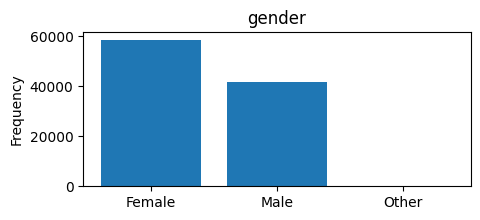

gender: 
 gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [58]:
graf_cat('gender')

In [59]:
def graf_num(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram plot.".format(variable))
    plt.show()

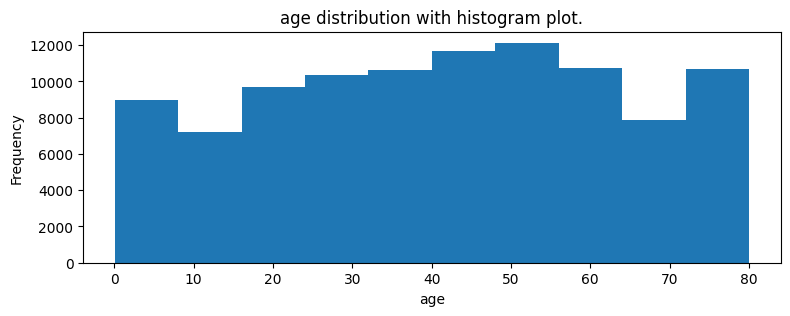

In [60]:
graf_num('age')

# Preproceso de variables

Si miramos la variable de historial como fumador, vemos que hay algunas categorías que en realidad hacen referencia a lo mismo. Podemos unirlas.

In [61]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [62]:
df['smoking_history'] = df['smoking_history'].replace({
    'ever': 'former',
    'not current': 'former'
})

Ahora bien, no se puede meter el texto de una variable categórica adentro de un modelo. Hay que transformarlo a números de alguna manera. Incluso los modelos que sí aceptan recibir directamente una variable categórica lo que hacen internamente es convertir esa variable a números de alguna manera. Una primera manera de hacer esto sería asignando un número a cada categoría. ¿Qué problema podría tener esto?

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [64]:
df['smoking_history_label']=le.fit_transform(df.smoking_history)

In [65]:
df['smoking_history_label'].unique()

array([3, 0, 1, 2])

Una idea mejor sería usar OneHotEncoder. ¿Qué problema podría tener esto?

In [66]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [67]:
one_hot_df =pd.DataFrame(ohe.fit_transform(df[['smoking_history']]).toarray())
one_hot_df.columns = ohe.categories_[0]

In [68]:
df=pd.concat([df, one_hot_df], axis=1)

In [69]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_label,No Info,current,former,never
0,Female,80.0,0,1,never,25.19,6.6,140,0,3,0.0,0.0,0.0,1.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,1.0,0.0,0.0,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,3,0.0,0.0,0.0,1.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1,0.0,1.0,0.0,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,0.0,1.0,0.0,0.0


In [70]:
one_hot_df =pd.DataFrame(ohe.fit_transform(df[['gender']]).toarray())
one_hot_df.columns = ohe.categories_[0]

In [71]:
df=pd.concat([df, one_hot_df], axis=1)

In [72]:
df.drop('smoking_history', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)

In [73]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_label,No Info,current,former,never,Female,Male,Other
0,80.0,0,1,25.19,6.6,140,0,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,54.0,0,0,27.32,6.6,80,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Modelo

In [74]:
from sklearn.model_selection import train_test_split
X = df.drop(labels = "diabetes", axis = 1)
y = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
from sklearn.linear_model import LogisticRegression
vars=['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'smoking_history_label', 'No Info', 'current',
       'former', 'never', 'Female', 'Male', 'Other']
clf = LogisticRegression(penalty=None,  max_iter=10000)
clf.fit(X_train[vars],y_train)

LogisticRegression(max_iter=10000, penalty=None)

In [76]:
acc_log_train = round(clf.score(X_train[vars], y_train)*100,2)
acc_log_test = round(clf.score(X_test[vars],y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 96.07
Testing Accuracy: % 95.9


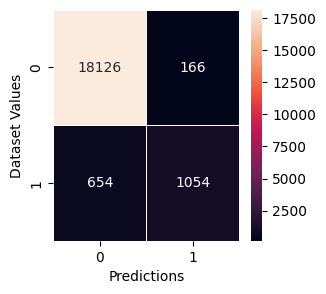

In [77]:
#Matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test[vars])
y_true = y_test
cm = confusion_matrix((y_true), y_pred)
f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

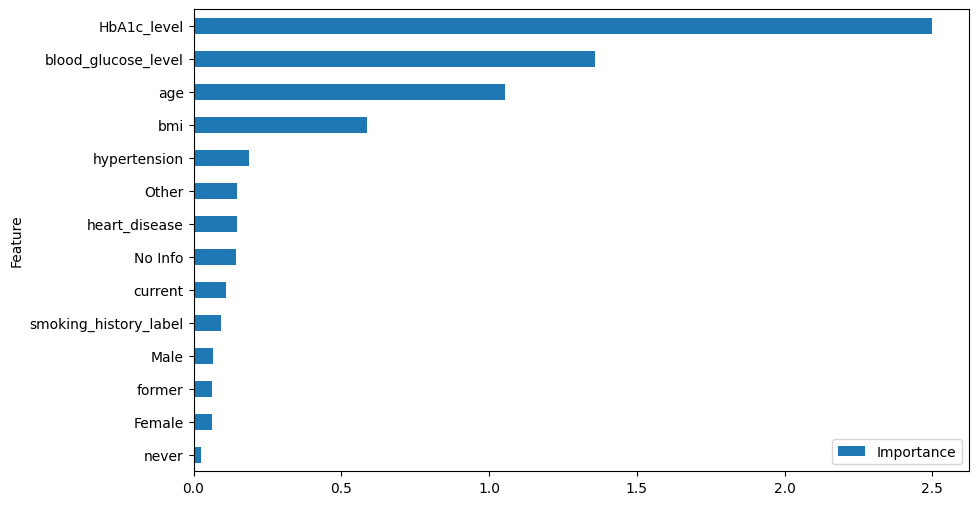

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

clf.fit(X_train_scaled[vars], y_train)
coefficients = clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
ax.legend(loc='lower right')  # Change 'upper right' to the desired location
plt.show()